In [1]:
library("biomaRt")
library(data.table)
library(clusterProfiler)
library(dplyr)
library(org.Hs.eg.db)
#library(org.Mm.eg.db)
library(msigdbr)
library(ggplot2)



clusterProfiler v4.10.0  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:biomaRt’:

    select


The following object is masked from ‘package:stats’:

    filter



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following object is masked from ‘package:biomaRt’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required pac

In [2]:
hsGenes <- fread('hc_S_TGC(cxcl14)_human.csv',col.names = c('index','gene'),header=T)$gene

In [3]:
musGenes <- fread('hc_S_TGC(cxcl14)_mouse.csv',col.names = c('index','gene'),header=T)$gene

In [26]:
#https://www.soinside.com/question/hYHMikTFfKdgzc5GVyfeyP
#biomaRt has encountered an unexpected server error.
#human = useMart("ensembl", dataset = "hsapiens_gene_ensembl")
human =useEnsembl(biomart = "ensembl", dataset = "hsapiens_gene_ensembl", mirror = "www")
#mouse = useMart("ensembl", dataset = "mmusculus_gene_ensembl")
mouse =useEnsembl(biomart = "ensembl", dataset = "mmusculus_gene_ensembl", mirror = "www")

hs_musGenes = getLDS(attributes = c("mgi_symbol"), filters = "mgi_symbol", 
                 values = musGenes, 
                 mart = mouse, 
                 attributesL = c("hgnc_symbol"), 
                 martL = human, uniqueRows=T)

ERROR: Error: biomaRt has encountered an unexpected server error.
Consider trying one of the Ensembl mirrors (for more details look at ?useEnsembl)


In [4]:
hs_musGenes = toupper(musGenes)

In [8]:
gene <- genes %>% bitr( fromType="SYMBOL", toType=c("ENTREZID"), OrgDb="org.Hs.eg.db")

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(., fromType = "SYMBOL", toType = c("ENTREZID"), OrgDb = "org.Hs.eg.db"):
“2.31% of input gene IDs are fail to map...”


In [9]:
go <- enrichGO(gene     = gene$ENTREZID,
              OrgDb        = org.Hs.eg.db,
              keyType       = 'ENTREZID',
              ont          = "BP",
              minGSSize    = 0,
              #maxGSSize    = 500,
              pvalueCutoff = 0.05,
              qvalueCutoff = 0.1,
              #eps = eps,
              #verbose      = FALSE
              )

In [10]:
kk <- enrichKEGG(gene         = gene$ENTREZID,
                 #keyType      = 'uniprot',
                 organism     = 'hsa',
                 pvalueCutoff = 0.05)

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



In [13]:
saveRDS(go,'hc_S_TGC(cxcl14)_GO.rds')
saveRDS(kk,'hc_S_TGC(cxcl14)_KEGG.rds')

In [19]:
result <- go@result[1:20,]
result$logp <- -log10(result$p.adjust)
result$Description <- factor(result$Description,levels = result$Description[order(result$logp,decreasing = F)])

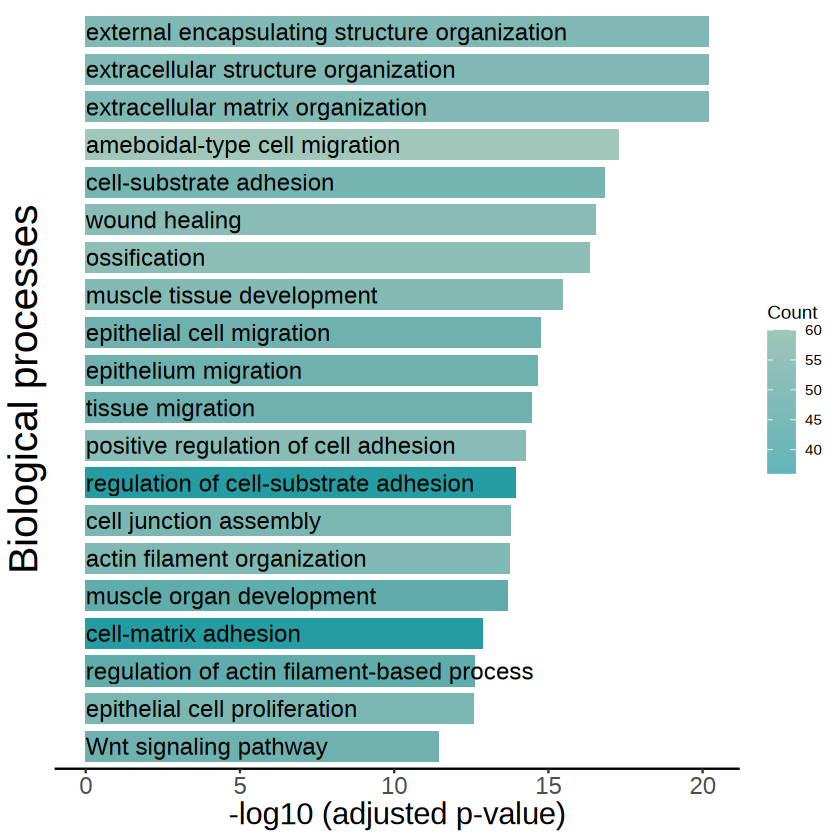

In [34]:
p <- ggplot(data = result ,aes(x=Description, y=logp)) +
    geom_bar(aes(fill=Count), stat="identity", alpha=1, width=.8) +
    geom_text(aes(label = Description, hjust = 0,y=0),colour = "black",size=5)+
    scale_fill_gradient(low='#259CA2BB',high = '#A1C7BB')+
    #geom_label(aes(label=Description,y=3))+
    coord_flip() +
    xlab("Biological processes") +
    ylab('-log10 (adjusted p-value)')+
    theme_classic()+
    theme(axis.text.y = element_blank(),
          axis.text.x = element_text(size=14),
          axis.title.x = element_text(size=18),
          axis.title.y = element_text(size=24),
          axis.line.y = element_blank(),
          axis.ticks.y= element_blank())
p

In [35]:
ggplot2::ggsave(p,filename = 'hc_S_TGC(cxcl14)_GO_top20.pdf',width = 10,height = 10)

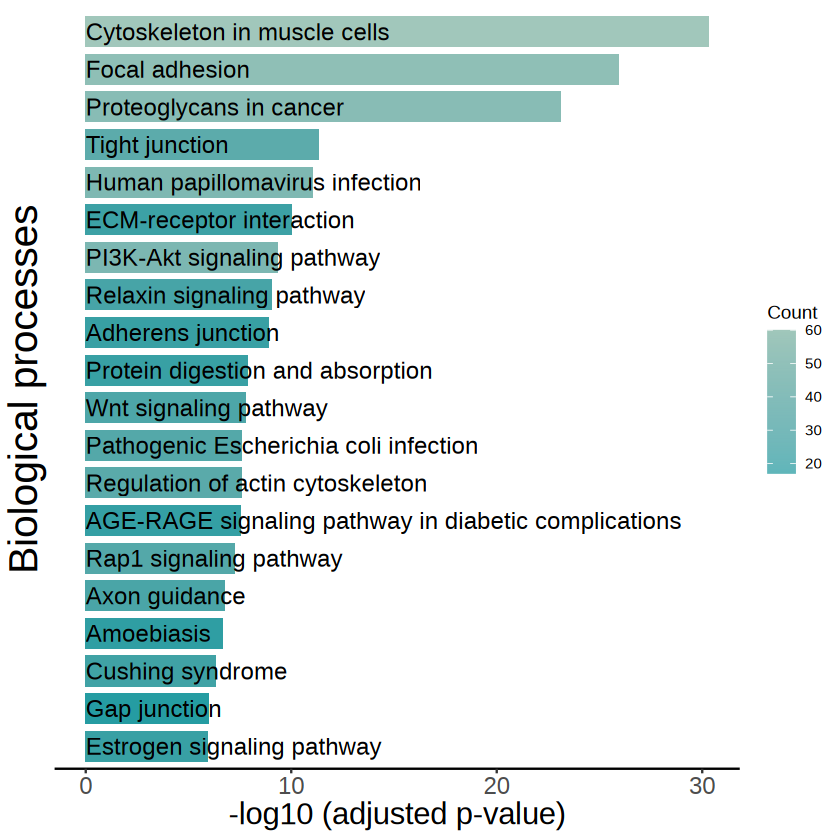

In [36]:
result <- kk@result[1:20,]
result$logp <- -log10(result$p.adjust)
result$Description <- factor(result$Description,levels = result$Description[order(result$logp,decreasing = F)])

p <- ggplot(data = result ,aes(x=Description, y=logp)) +
    geom_bar(aes(fill=Count), stat="identity", alpha=1, width=.8) +
    geom_text(aes(label = Description, hjust = 0,y=0),colour = "black",size=5)+
    scale_fill_gradient(low='#259CA2BB',high = '#A1C7BB')+
    #geom_label(aes(label=Description,y=3))+
    coord_flip() +
    xlab("Biological processes") +
    ylab('-log10 (adjusted p-value)')+
    theme_classic()+
    theme(axis.text.y = element_blank(),
          axis.text.x = element_text(size=14),
          axis.title.x = element_text(size=18),
          axis.title.y = element_text(size=24),
          axis.line.y = element_blank(),
          axis.ticks.y= element_blank())
p

In [37]:
ggplot2::ggsave(p,filename = 'hc_S_TGC(cxcl14)_KEGG_top20.pdf',width = 10,height = 10)

In [7]:
hsGenes <- fread('hc_S_TGC(muc5)_human.csv',col.names = c('index','gene'),header=T)$gene
musGenes <- fread('hc_S_TGC(muc5)_mouse.csv',col.names = c('index','gene'),header=T)$gene
hs_musGenes = toupper(musGenes)

genes <- union(hsGenes,hs_musGenes)
length(genes)
gene <- genes %>% bitr( fromType="SYMBOL", toType=c("ENTREZID"), OrgDb="org.Hs.eg.db")

[1] 93

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(., fromType = "SYMBOL", toType = c("ENTREZID"), OrgDb = "org.Hs.eg.db"):
“1.08% of input gene IDs are fail to map...”


In [9]:
go <- enrichGO(gene     = gene$ENTREZID,
              OrgDb        = org.Hs.eg.db,
              keyType       = 'ENTREZID',
              ont          = "BP",
              minGSSize    = 0,
              #maxGSSize    = 500,
              pvalueCutoff = 0.05,
              qvalueCutoff = 0.1,
              #eps = eps,
              #verbose      = FALSE
              )

kk <- enrichKEGG(gene         = gene$ENTREZID,
                 #keyType      = 'uniprot',
                 organism     = 'hsa',
                 pvalueCutoff = 0.05)

saveRDS(go,'hc_S_TGC(muc5)_GO.rds')
saveRDS(kk,'hc_S_TGC(muc5)_KEGG.rds')

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



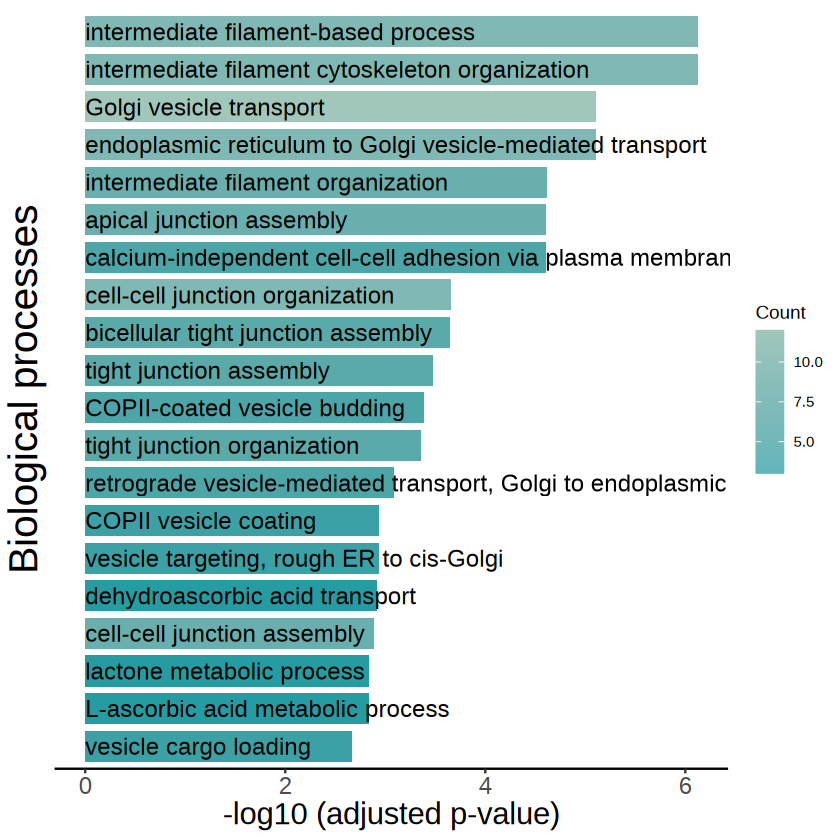

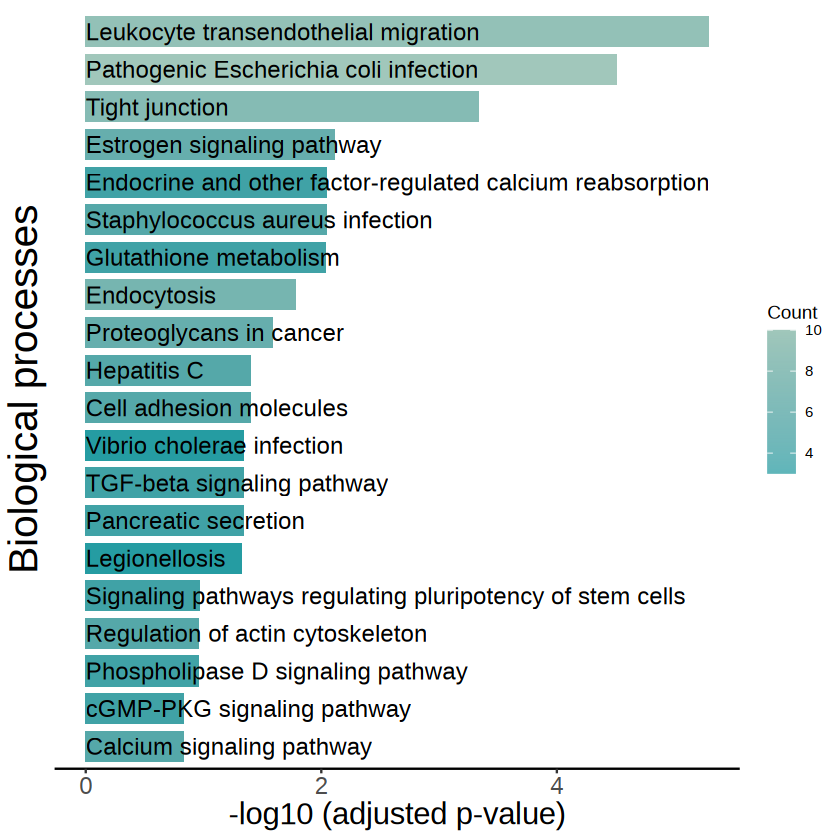

In [10]:
result <- go@result[1:20,]
result$logp <- -log10(result$p.adjust)
result$Description <- factor(result$Description,levels = result$Description[order(result$logp,decreasing = F)])

p1 <- ggplot(data = result ,aes(x=Description, y=logp)) +
    geom_bar(aes(fill=Count), stat="identity", alpha=1, width=.8) +
    geom_text(aes(label = Description, hjust = 0,y=0),colour = "black",size=5)+
    scale_fill_gradient(low='#259CA2BB',high = '#A1C7BB')+
    #geom_label(aes(label=Description,y=3))+
    coord_flip() +
    xlab("Biological processes") +
    ylab('-log10 (adjusted p-value)')+
    theme_classic()+
    theme(axis.text.y = element_blank(),
          axis.text.x = element_text(size=14),
          axis.title.x = element_text(size=18),
          axis.title.y = element_text(size=24),
          axis.line.y = element_blank(),
          axis.ticks.y= element_blank())
p1

result <- kk@result[1:20,]
result$logp <- -log10(result$p.adjust)
result$Description <- factor(result$Description,levels = result$Description[order(result$logp,decreasing = F)])

p2 <- ggplot(data = result ,aes(x=Description, y=logp)) +
    geom_bar(aes(fill=Count), stat="identity", alpha=1, width=.8) +
    geom_text(aes(label = Description, hjust = 0,y=0),colour = "black",size=5)+
    scale_fill_gradient(low='#259CA2BB',high = '#A1C7BB')+
    #geom_label(aes(label=Description,y=3))+
    coord_flip() +
    xlab("Biological processes") +
    ylab('-log10 (adjusted p-value)')+
    theme_classic()+
    theme(axis.text.y = element_blank(),
          axis.text.x = element_text(size=14),
          axis.title.x = element_text(size=18),
          axis.title.y = element_text(size=24),
          axis.line.y = element_blank(),
          axis.ticks.y= element_blank())
p2

In [11]:
ggplot2::ggsave(p1,filename = 'hc_S_TGC(muc5)_GO_top20.pdf',width = 10,height = 10)
ggplot2::ggsave(p2,filename = 'hc_S_TGC(muc5)_KEGG_top20.pdf',width = 10,height = 10)

In [14]:
hsGenes <- fread('hc_S_TGC(nucb2)_human.csv',col.names = c('index','gene'),header=T)$gene
#musGenes <- fread('hc_S_TGC(nucb2)_mouse.csv',col.names = c('index','gene'),header=T)$gene
#hs_musGenes = toupper(musGenes)

#genes <- union(hsGenes,hs_musGenes)
length(hsGenes)
gene <- hsGenes %>% bitr( fromType="SYMBOL", toType=c("ENTREZID"), OrgDb="org.Hs.eg.db")

[1] 363

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(., fromType = "SYMBOL", toType = c("ENTREZID"), OrgDb = "org.Hs.eg.db"):
“0.35% of input gene IDs are fail to map...”


In [15]:
go <- enrichGO(gene     = gene$ENTREZID,
              OrgDb        = org.Hs.eg.db,
              keyType       = 'ENTREZID',
              ont          = "BP",
              minGSSize    = 0,
              #maxGSSize    = 500,
              pvalueCutoff = 0.05,
              qvalueCutoff = 0.1,
              #eps = eps,
              #verbose      = FALSE
              )

kk <- enrichKEGG(gene         = gene$ENTREZID,
                 #keyType      = 'uniprot',
                 organism     = 'hsa',
                 pvalueCutoff = 0.05)

saveRDS(go,'hc_S_TGC(nucb2)_GO.rds')
saveRDS(kk,'hc_S_TGC(nucb2)_KEGG.rds')

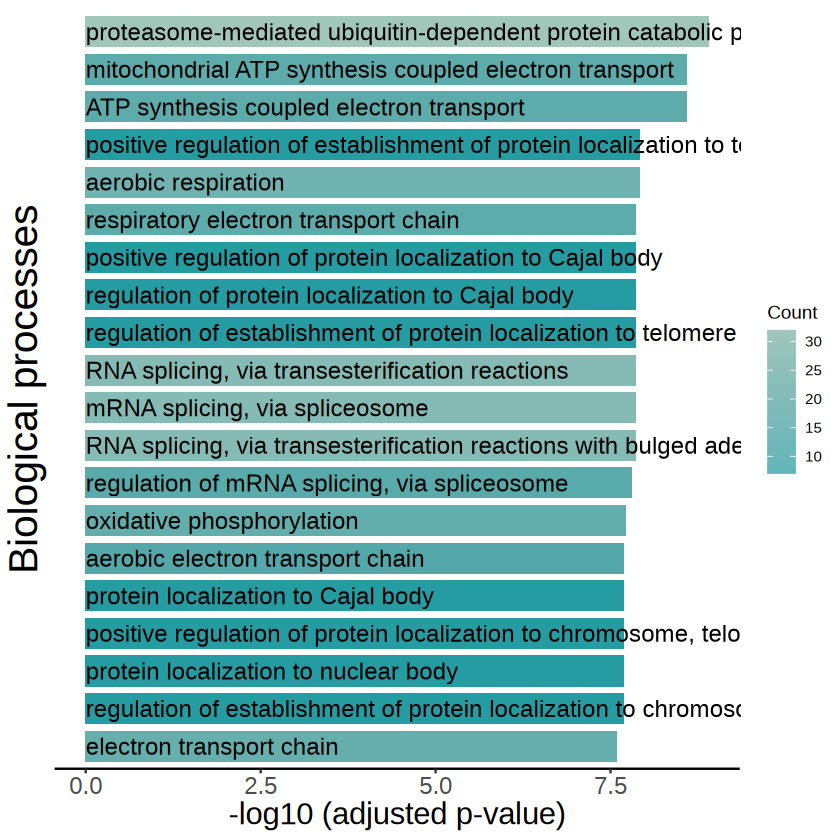

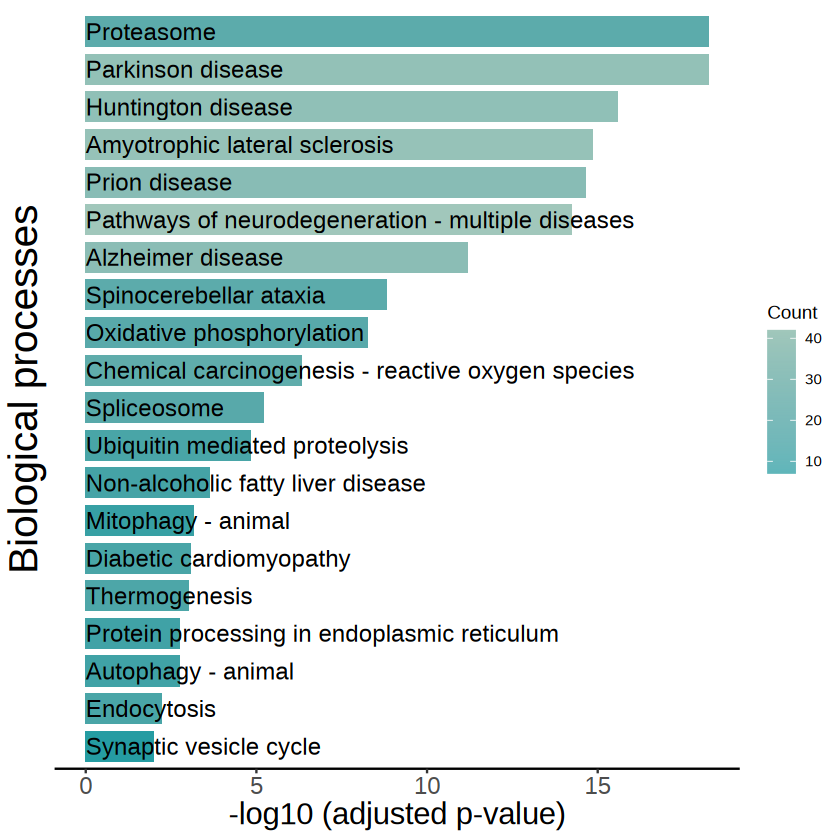

In [16]:
result <- go@result[1:20,]
result$logp <- -log10(result$p.adjust)
result$Description <- factor(result$Description,levels = result$Description[order(result$logp,decreasing = F)])

p1 <- ggplot(data = result ,aes(x=Description, y=logp)) +
    geom_bar(aes(fill=Count), stat="identity", alpha=1, width=.8) +
    geom_text(aes(label = Description, hjust = 0,y=0),colour = "black",size=5)+
    scale_fill_gradient(low='#259CA2BB',high = '#A1C7BB')+
    #geom_label(aes(label=Description,y=3))+
    coord_flip() +
    xlab("Biological processes") +
    ylab('-log10 (adjusted p-value)')+
    theme_classic()+
    theme(axis.text.y = element_blank(),
          axis.text.x = element_text(size=14),
          axis.title.x = element_text(size=18),
          axis.title.y = element_text(size=24),
          axis.line.y = element_blank(),
          axis.ticks.y= element_blank())
p1

result <- kk@result[1:20,]
result$logp <- -log10(result$p.adjust)
result$Description <- factor(result$Description,levels = result$Description[order(result$logp,decreasing = F)])

p2 <- ggplot(data = result ,aes(x=Description, y=logp)) +
    geom_bar(aes(fill=Count), stat="identity", alpha=1, width=.8) +
    geom_text(aes(label = Description, hjust = 0,y=0),colour = "black",size=5)+
    scale_fill_gradient(low='#259CA2BB',high = '#A1C7BB')+
    #geom_label(aes(label=Description,y=3))+
    coord_flip() +
    xlab("Biological processes") +
    ylab('-log10 (adjusted p-value)')+
    theme_classic()+
    theme(axis.text.y = element_blank(),
          axis.text.x = element_text(size=14),
          axis.title.x = element_text(size=18),
          axis.title.y = element_text(size=24),
          axis.line.y = element_blank(),
          axis.ticks.y= element_blank())
p2

In [17]:
ggplot2::ggsave(p1,filename = 'hc_S_TGC(nucb2)_GO_top20.pdf',width = 10,height = 10)
ggplot2::ggsave(p2,filename = 'hc_S_TGC(nucb2)_KEGG_top20.pdf',width = 10,height = 10)

In [19]:
hsGenes <- fread('hc_S_decidual_human.csv',col.names = c('index','gene'),header=T)$gene
musGenes <- fread('hc_S_decidual_mouse.csv',col.names = c('index','gene'),header=T)$gene
hs_musGenes = toupper(musGenes)

genes <- union(hsGenes,hs_musGenes)
length(genes)
gene <- genes %>% bitr( fromType="SYMBOL", toType=c("ENTREZID"), OrgDb="org.Hs.eg.db")

[1] 1025

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(., fromType = "SYMBOL", toType = c("ENTREZID"), OrgDb = "org.Hs.eg.db"):
“3.22% of input gene IDs are fail to map...”


In [20]:
go <- enrichGO(gene     = gene$ENTREZID,
              OrgDb        = org.Hs.eg.db,
              keyType       = 'ENTREZID',
              ont          = "BP",
              minGSSize    = 0,
              #maxGSSize    = 500,
              pvalueCutoff = 0.05,
              qvalueCutoff = 0.1,
              #eps = eps,
              #verbose      = FALSE
              )

kk <- enrichKEGG(gene         = gene$ENTREZID,
                 #keyType      = 'uniprot',
                 organism     = 'hsa',
                 pvalueCutoff = 0.05)

saveRDS(go,'hc_S_decidual_GO.rds')
saveRDS(kk,'hc_S_decidual_KEGG.rds')

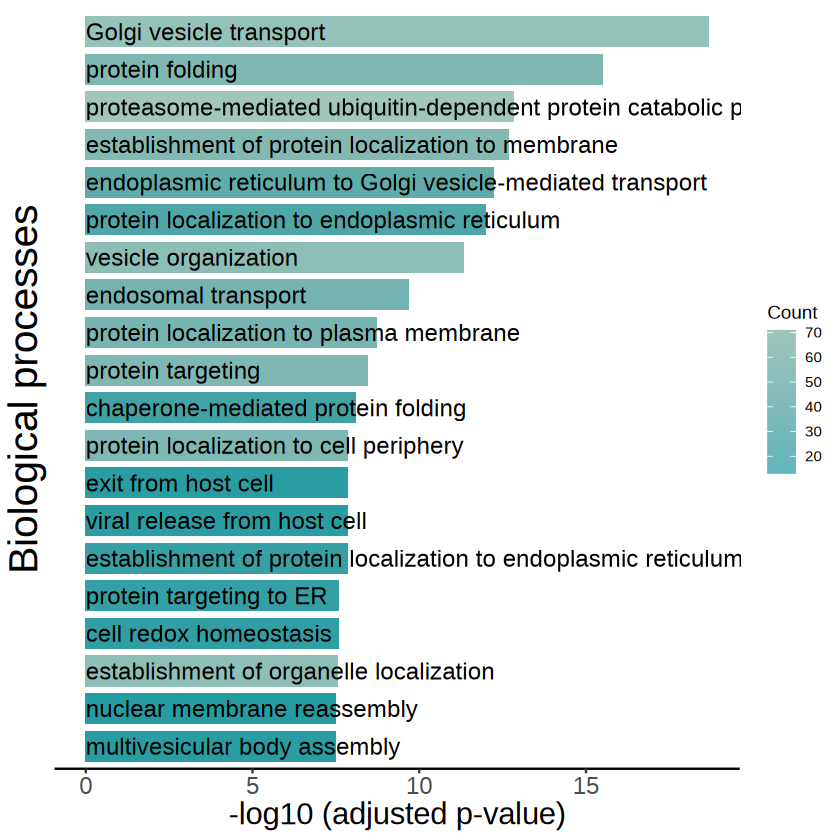

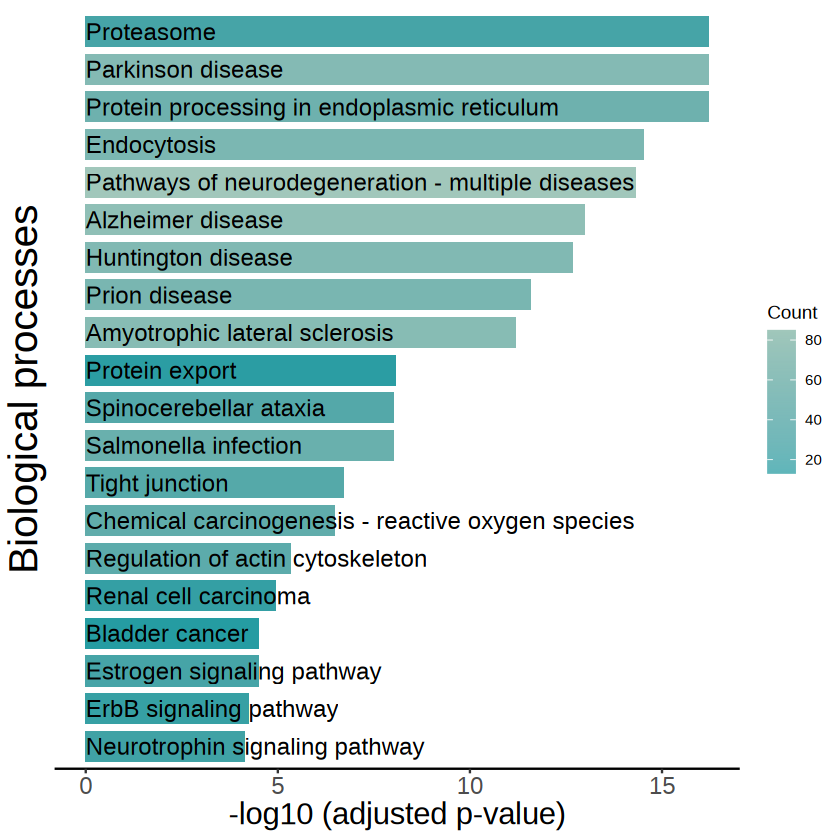

In [21]:
result <- go@result[1:20,]
result$logp <- -log10(result$p.adjust)
result$Description <- factor(result$Description,levels = result$Description[order(result$logp,decreasing = F)])

p1 <- ggplot(data = result ,aes(x=Description, y=logp)) +
    geom_bar(aes(fill=Count), stat="identity", alpha=1, width=.8) +
    geom_text(aes(label = Description, hjust = 0,y=0),colour = "black",size=5)+
    scale_fill_gradient(low='#259CA2BB',high = '#A1C7BB')+
    #geom_label(aes(label=Description,y=3))+
    coord_flip() +
    xlab("Biological processes") +
    ylab('-log10 (adjusted p-value)')+
    theme_classic()+
    theme(axis.text.y = element_blank(),
          axis.text.x = element_text(size=14),
          axis.title.x = element_text(size=18),
          axis.title.y = element_text(size=24),
          axis.line.y = element_blank(),
          axis.ticks.y= element_blank())
p1

result <- kk@result[1:20,]
result$logp <- -log10(result$p.adjust)
result$Description <- factor(result$Description,levels = result$Description[order(result$logp,decreasing = F)])

p2 <- ggplot(data = result ,aes(x=Description, y=logp)) +
    geom_bar(aes(fill=Count), stat="identity", alpha=1, width=.8) +
    geom_text(aes(label = Description, hjust = 0,y=0),colour = "black",size=5)+
    scale_fill_gradient(low='#259CA2BB',high = '#A1C7BB')+
    #geom_label(aes(label=Description,y=3))+
    coord_flip() +
    xlab("Biological processes") +
    ylab('-log10 (adjusted p-value)')+
    theme_classic()+
    theme(axis.text.y = element_blank(),
          axis.text.x = element_text(size=14),
          axis.title.x = element_text(size=18),
          axis.title.y = element_text(size=24),
          axis.line.y = element_blank(),
          axis.ticks.y= element_blank())
p2

In [22]:
ggplot2::ggsave(p1,filename = 'hc_S_decidual_GO_top20.pdf',width = 10,height = 10)
ggplot2::ggsave(p2,filename = 'hc_S_decidual_KEGG_top20.pdf',width = 10,height = 10)

In [23]:
hsGenes <- fread('hc_S_immune_human.csv',col.names = c('index','gene'),header=T)$gene
musGenes <- fread('hc_S_immune_mouse.csv',col.names = c('index','gene'),header=T)$gene
hs_musGenes = toupper(musGenes)

genes <- union(hsGenes,hs_musGenes)
length(genes)
gene <- genes %>% bitr( fromType="SYMBOL", toType=c("ENTREZID"), OrgDb="org.Hs.eg.db")

[1] 471

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(., fromType = "SYMBOL", toType = c("ENTREZID"), OrgDb = "org.Hs.eg.db"):
“1.49% of input gene IDs are fail to map...”


In [24]:
go <- enrichGO(gene     = gene$ENTREZID,
              OrgDb        = org.Hs.eg.db,
              keyType       = 'ENTREZID',
              ont          = "BP",
              minGSSize    = 0,
              #maxGSSize    = 500,
              pvalueCutoff = 0.05,
              qvalueCutoff = 0.1,
              #eps = eps,
              #verbose      = FALSE
              )

kk <- enrichKEGG(gene         = gene$ENTREZID,
                 #keyType      = 'uniprot',
                 organism     = 'hsa',
                 pvalueCutoff = 0.05)

saveRDS(go,'hc_S_immune_GO.rds')
saveRDS(kk,'hc_S_immune_KEGG.rds')

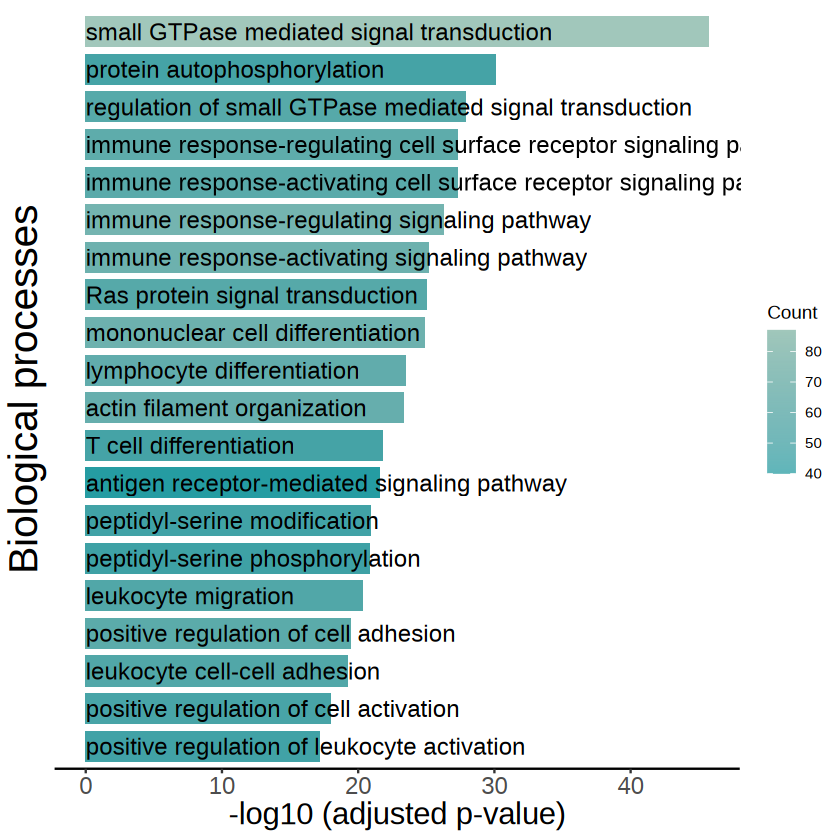

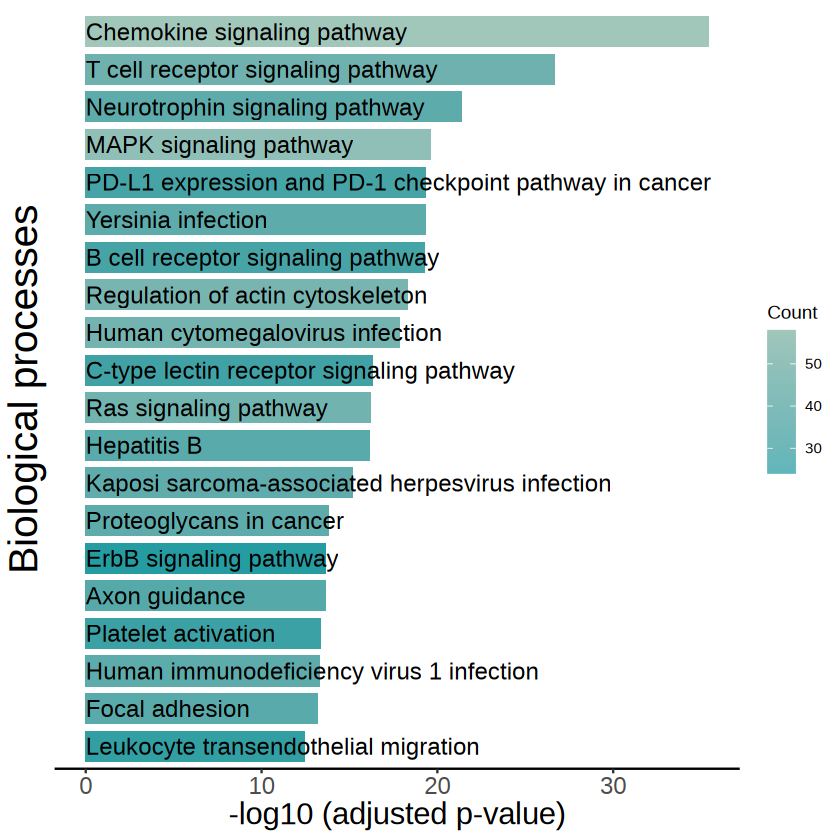

In [25]:
result <- go@result[1:20,]
result$logp <- -log10(result$p.adjust)
result$Description <- factor(result$Description,levels = result$Description[order(result$logp,decreasing = F)])

p1 <- ggplot(data = result ,aes(x=Description, y=logp)) +
    geom_bar(aes(fill=Count), stat="identity", alpha=1, width=.8) +
    geom_text(aes(label = Description, hjust = 0,y=0),colour = "black",size=5)+
    scale_fill_gradient(low='#259CA2BB',high = '#A1C7BB')+
    #geom_label(aes(label=Description,y=3))+
    coord_flip() +
    xlab("Biological processes") +
    ylab('-log10 (adjusted p-value)')+
    theme_classic()+
    theme(axis.text.y = element_blank(),
          axis.text.x = element_text(size=14),
          axis.title.x = element_text(size=18),
          axis.title.y = element_text(size=24),
          axis.line.y = element_blank(),
          axis.ticks.y= element_blank())
p1

result <- kk@result[1:20,]
result$logp <- -log10(result$p.adjust)
result$Description <- factor(result$Description,levels = result$Description[order(result$logp,decreasing = F)])

p2 <- ggplot(data = result ,aes(x=Description, y=logp)) +
    geom_bar(aes(fill=Count), stat="identity", alpha=1, width=.8) +
    geom_text(aes(label = Description, hjust = 0,y=0),colour = "black",size=5)+
    scale_fill_gradient(low='#259CA2BB',high = '#A1C7BB')+
    #geom_label(aes(label=Description,y=3))+
    coord_flip() +
    xlab("Biological processes") +
    ylab('-log10 (adjusted p-value)')+
    theme_classic()+
    theme(axis.text.y = element_blank(),
          axis.text.x = element_text(size=14),
          axis.title.x = element_text(size=18),
          axis.title.y = element_text(size=24),
          axis.line.y = element_blank(),
          axis.ticks.y= element_blank())
p2

In [26]:
ggplot2::ggsave(p1,filename = 'hc_S_immune_GO_top20.pdf',width = 10,height = 10)
ggplot2::ggsave(p2,filename = 'hc_S_immune_KEGG_top20.pdf',width = 10,height = 10)

In [27]:
hsGenes <- fread('hc_S_FB_human.csv',col.names = c('index','gene'),header=T)$gene
musGenes <- fread('hc_S_FB_mouse.csv',col.names = c('index','gene'),header=T)$gene
hs_musGenes = toupper(musGenes)

genes <- union(hsGenes,hs_musGenes)
length(genes)
gene <- genes %>% bitr( fromType="SYMBOL", toType=c("ENTREZID"), OrgDb="org.Hs.eg.db")

[1] 592

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(., fromType = "SYMBOL", toType = c("ENTREZID"), OrgDb = "org.Hs.eg.db"):
“3.04% of input gene IDs are fail to map...”


In [28]:
go <- enrichGO(gene     = gene$ENTREZID,
              OrgDb        = org.Hs.eg.db,
              keyType       = 'ENTREZID',
              ont          = "BP",
              minGSSize    = 0,
              #maxGSSize    = 500,
              pvalueCutoff = 0.05,
              qvalueCutoff = 0.1,
              #eps = eps,
              #verbose      = FALSE
              )

kk <- enrichKEGG(gene         = gene$ENTREZID,
                 #keyType      = 'uniprot',
                 organism     = 'hsa',
                 pvalueCutoff = 0.05)

saveRDS(go,'hc_S_FB_GO.rds')
saveRDS(kk,'hc_S_FB_KEGG.rds')

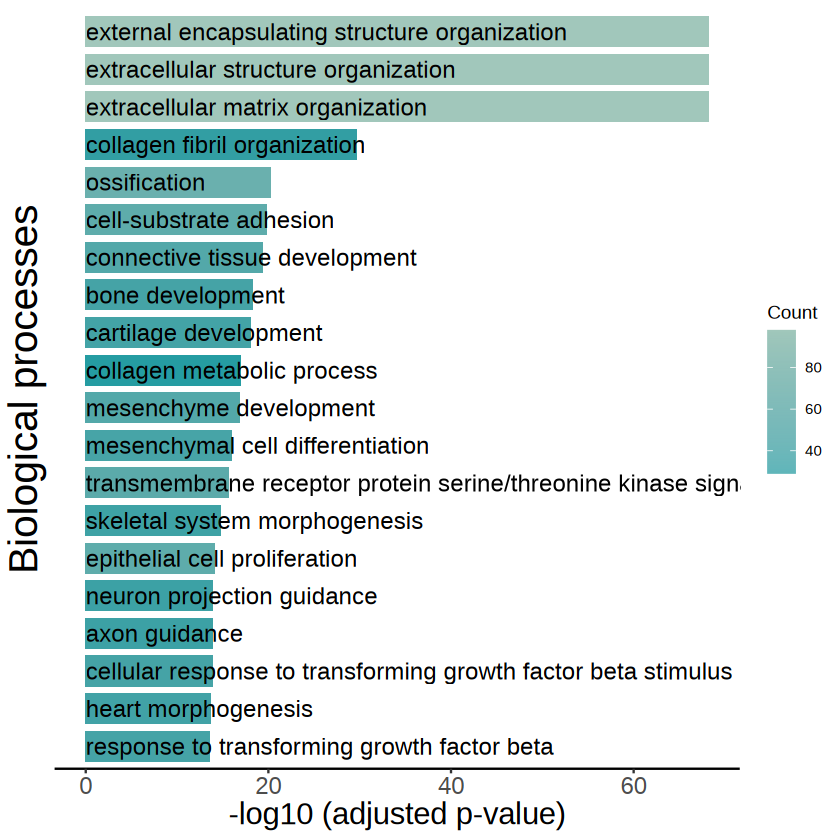

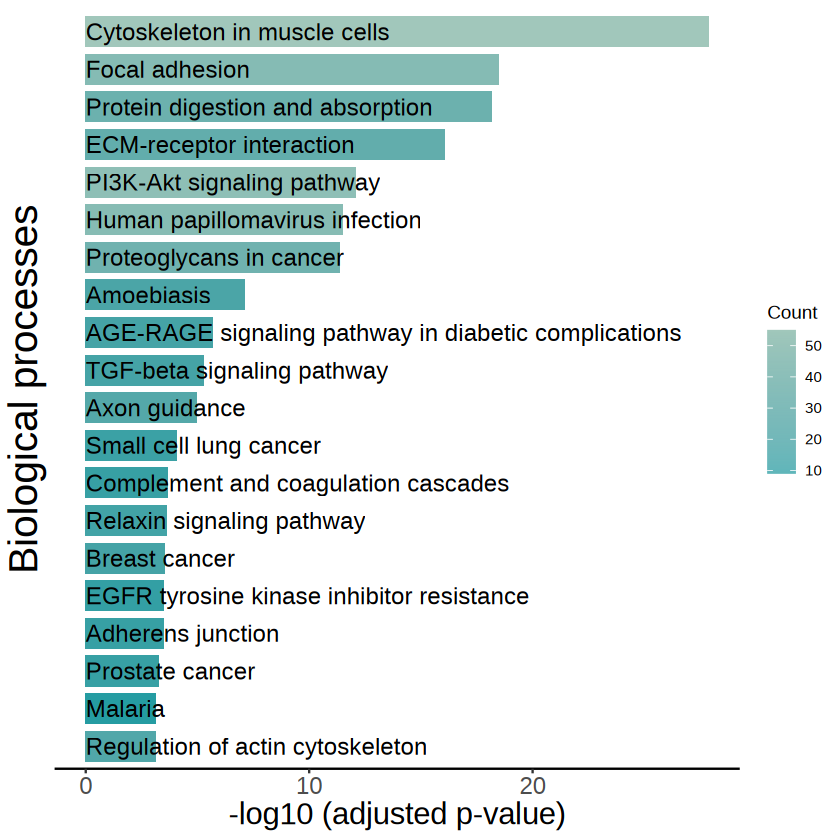

In [29]:
result <- go@result[1:20,]
result$logp <- -log10(result$p.adjust)
result$Description <- factor(result$Description,levels = result$Description[order(result$logp,decreasing = F)])

p1 <- ggplot(data = result ,aes(x=Description, y=logp)) +
    geom_bar(aes(fill=Count), stat="identity", alpha=1, width=.8) +
    geom_text(aes(label = Description, hjust = 0,y=0),colour = "black",size=5)+
    scale_fill_gradient(low='#259CA2BB',high = '#A1C7BB')+
    #geom_label(aes(label=Description,y=3))+
    coord_flip() +
    xlab("Biological processes") +
    ylab('-log10 (adjusted p-value)')+
    theme_classic()+
    theme(axis.text.y = element_blank(),
          axis.text.x = element_text(size=14),
          axis.title.x = element_text(size=18),
          axis.title.y = element_text(size=24),
          axis.line.y = element_blank(),
          axis.ticks.y= element_blank())
p1

result <- kk@result[1:20,]
result$logp <- -log10(result$p.adjust)
result$Description <- factor(result$Description,levels = result$Description[order(result$logp,decreasing = F)])

p2 <- ggplot(data = result ,aes(x=Description, y=logp)) +
    geom_bar(aes(fill=Count), stat="identity", alpha=1, width=.8) +
    geom_text(aes(label = Description, hjust = 0,y=0),colour = "black",size=5)+
    scale_fill_gradient(low='#259CA2BB',high = '#A1C7BB')+
    #geom_label(aes(label=Description,y=3))+
    coord_flip() +
    xlab("Biological processes") +
    ylab('-log10 (adjusted p-value)')+
    theme_classic()+
    theme(axis.text.y = element_blank(),
          axis.text.x = element_text(size=14),
          axis.title.x = element_text(size=18),
          axis.title.y = element_text(size=24),
          axis.line.y = element_blank(),
          axis.ticks.y= element_blank())
p2

In [30]:
ggplot2::ggsave(p1,filename = 'hc_S_FB_GO_top20.pdf',width = 10,height = 10)
ggplot2::ggsave(p2,filename = 'hc_S_FB_KEGG_top20.pdf',width = 10,height = 10)

In [31]:
hsGenes <- fread('hc_S_endo_human.csv',col.names = c('index','gene'),header=T)$gene
musGenes <- fread('hc_S_endo_mouse.csv',col.names = c('index','gene'),header=T)$gene
hs_musGenes = toupper(musGenes)

genes <- union(hsGenes,hs_musGenes)
length(genes)
gene <- genes %>% bitr( fromType="SYMBOL", toType=c("ENTREZID"), OrgDb="org.Hs.eg.db")

[1] 563

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(., fromType = "SYMBOL", toType = c("ENTREZID"), OrgDb = "org.Hs.eg.db"):
“3.02% of input gene IDs are fail to map...”


In [32]:
go <- enrichGO(gene     = gene$ENTREZID,
              OrgDb        = org.Hs.eg.db,
              keyType       = 'ENTREZID',
              ont          = "BP",
              minGSSize    = 0,
              #maxGSSize    = 500,
              pvalueCutoff = 0.05,
              qvalueCutoff = 0.1,
              #eps = eps,
              #verbose      = FALSE
              )

kk <- enrichKEGG(gene         = gene$ENTREZID,
                 #keyType      = 'uniprot',
                 organism     = 'hsa',
                 pvalueCutoff = 0.05)

saveRDS(go,'hc_S_endo_GO.rds')
saveRDS(kk,'hc_S_endo_KEGG.rds')

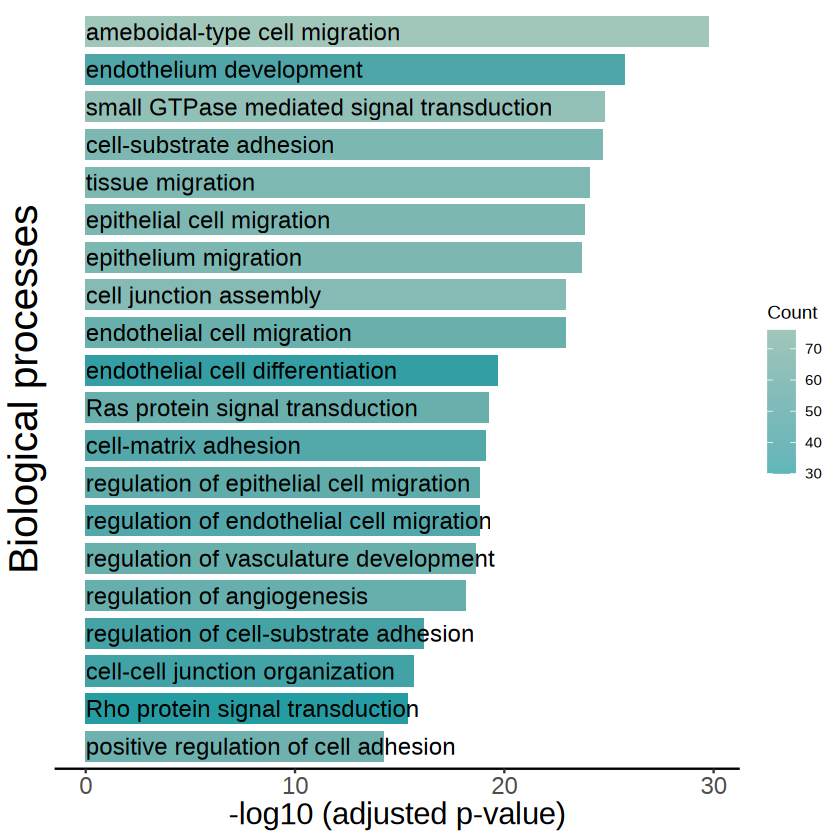

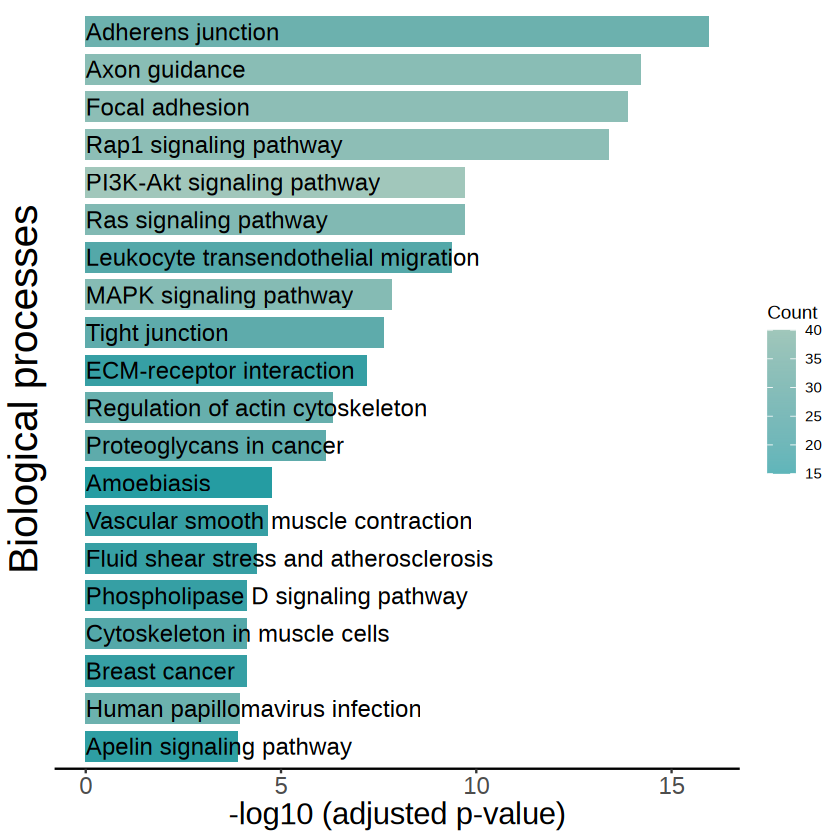

In [33]:
result <- go@result[1:20,]
result$logp <- -log10(result$p.adjust)
result$Description <- factor(result$Description,levels = result$Description[order(result$logp,decreasing = F)])

p1 <- ggplot(data = result ,aes(x=Description, y=logp)) +
    geom_bar(aes(fill=Count), stat="identity", alpha=1, width=.8) +
    geom_text(aes(label = Description, hjust = 0,y=0),colour = "black",size=5)+
    scale_fill_gradient(low='#259CA2BB',high = '#A1C7BB')+
    #geom_label(aes(label=Description,y=3))+
    coord_flip() +
    xlab("Biological processes") +
    ylab('-log10 (adjusted p-value)')+
    theme_classic()+
    theme(axis.text.y = element_blank(),
          axis.text.x = element_text(size=14),
          axis.title.x = element_text(size=18),
          axis.title.y = element_text(size=24),
          axis.line.y = element_blank(),
          axis.ticks.y= element_blank())
p1

result <- kk@result[1:20,]
result$logp <- -log10(result$p.adjust)
result$Description <- factor(result$Description,levels = result$Description[order(result$logp,decreasing = F)])

p2 <- ggplot(data = result ,aes(x=Description, y=logp)) +
    geom_bar(aes(fill=Count), stat="identity", alpha=1, width=.8) +
    geom_text(aes(label = Description, hjust = 0,y=0),colour = "black",size=5)+
    scale_fill_gradient(low='#259CA2BB',high = '#A1C7BB')+
    #geom_label(aes(label=Description,y=3))+
    coord_flip() +
    xlab("Biological processes") +
    ylab('-log10 (adjusted p-value)')+
    theme_classic()+
    theme(axis.text.y = element_blank(),
          axis.text.x = element_text(size=14),
          axis.title.x = element_text(size=18),
          axis.title.y = element_text(size=24),
          axis.line.y = element_blank(),
          axis.ticks.y= element_blank())
p2

In [34]:
ggplot2::ggsave(p1,filename = 'hc_S_endo_GO_top20.pdf',width = 10,height = 10)
ggplot2::ggsave(p2,filename = 'hc_S_endo_KEGG_top20.pdf',width = 10,height = 10)

In [35]:
hsGenes <- fread('hc_S_basal&progenitor_human.csv',col.names = c('index','gene'),header=T)$gene
musGenes <- fread('hc_S_basal&progenitor_mouse.csv',col.names = c('index','gene'),header=T)$gene
hs_musGenes = toupper(musGenes)

genes <- union(hsGenes,hs_musGenes)
length(genes)
gene <- genes %>% bitr( fromType="SYMBOL", toType=c("ENTREZID"), OrgDb="org.Hs.eg.db")

[1] 1075

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(., fromType = "SYMBOL", toType = c("ENTREZID"), OrgDb = "org.Hs.eg.db"):
“2.42% of input gene IDs are fail to map...”


In [36]:
go <- enrichGO(gene     = gene$ENTREZID,
              OrgDb        = org.Hs.eg.db,
              keyType       = 'ENTREZID',
              ont          = "BP",
              minGSSize    = 0,
              #maxGSSize    = 500,
              pvalueCutoff = 0.05,
              qvalueCutoff = 0.1,
              #eps = eps,
              #verbose      = FALSE
              )

kk <- enrichKEGG(gene         = gene$ENTREZID,
                 #keyType      = 'uniprot',
                 organism     = 'hsa',
                 pvalueCutoff = 0.05)

saveRDS(go,'hc_S_basal&progenitor_GO.rds')
saveRDS(kk,'hc_S_basal&progenitor_KEGG.rds')

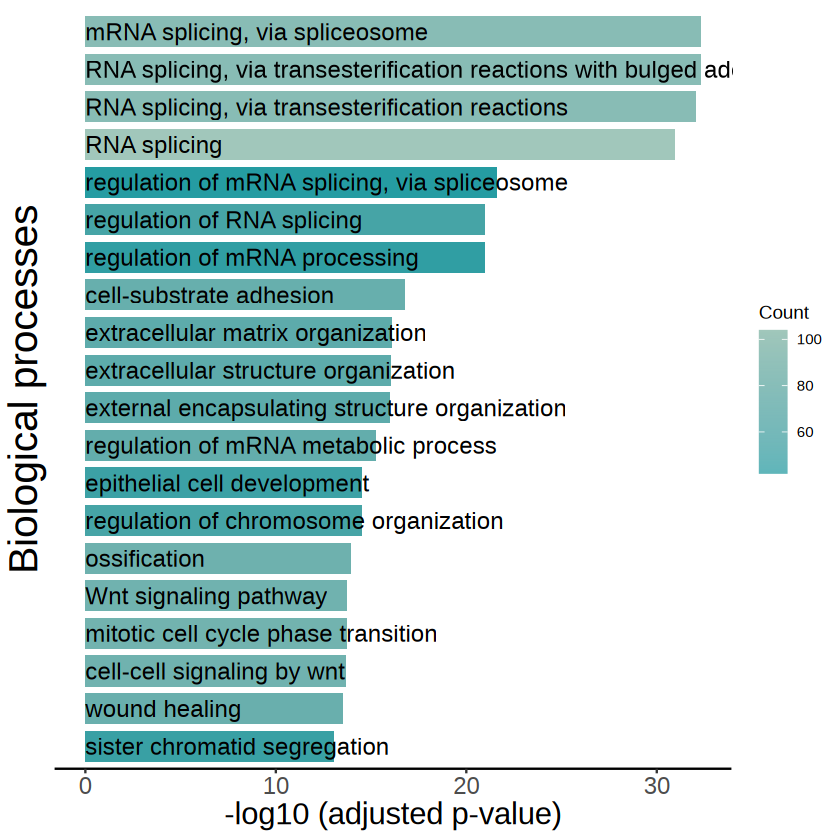

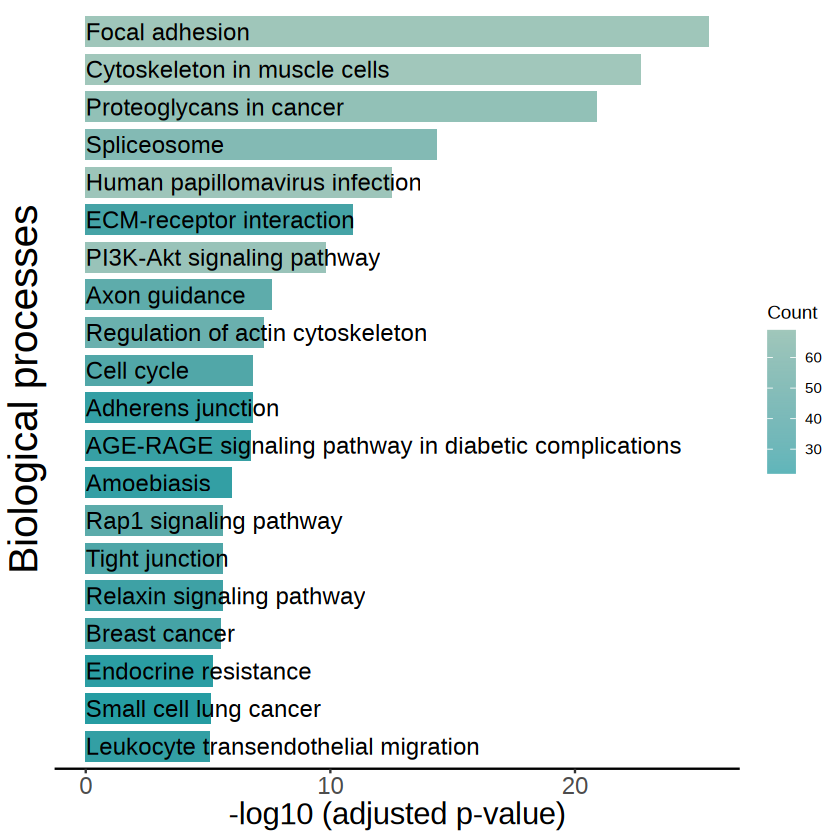

In [37]:
result <- go@result[1:20,]
result$logp <- -log10(result$p.adjust)
result$Description <- factor(result$Description,levels = result$Description[order(result$logp,decreasing = F)])

p1 <- ggplot(data = result ,aes(x=Description, y=logp)) +
    geom_bar(aes(fill=Count), stat="identity", alpha=1, width=.8) +
    geom_text(aes(label = Description, hjust = 0,y=0),colour = "black",size=5)+
    scale_fill_gradient(low='#259CA2BB',high = '#A1C7BB')+
    #geom_label(aes(label=Description,y=3))+
    coord_flip() +
    xlab("Biological processes") +
    ylab('-log10 (adjusted p-value)')+
    theme_classic()+
    theme(axis.text.y = element_blank(),
          axis.text.x = element_text(size=14),
          axis.title.x = element_text(size=18),
          axis.title.y = element_text(size=24),
          axis.line.y = element_blank(),
          axis.ticks.y= element_blank())
p1

result <- kk@result[1:20,]
result$logp <- -log10(result$p.adjust)
result$Description <- factor(result$Description,levels = result$Description[order(result$logp,decreasing = F)])

p2 <- ggplot(data = result ,aes(x=Description, y=logp)) +
    geom_bar(aes(fill=Count), stat="identity", alpha=1, width=.8) +
    geom_text(aes(label = Description, hjust = 0,y=0),colour = "black",size=5)+
    scale_fill_gradient(low='#259CA2BB',high = '#A1C7BB')+
    #geom_label(aes(label=Description,y=3))+
    coord_flip() +
    xlab("Biological processes") +
    ylab('-log10 (adjusted p-value)')+
    theme_classic()+
    theme(axis.text.y = element_blank(),
          axis.text.x = element_text(size=14),
          axis.title.x = element_text(size=18),
          axis.title.y = element_text(size=24),
          axis.line.y = element_blank(),
          axis.ticks.y= element_blank())
p2

In [38]:
ggplot2::ggsave(p1,filename = 'hc_S_basal&progenitor_GO_top20.pdf',width = 10,height = 10)
ggplot2::ggsave(p2,filename = 'hc_S_basal&progenitor_KEGG_top20.pdf',width = 10,height = 10)